<a href="https://colab.research.google.com/github/sukhmanvir32/churn-analysis_project/blob/main/churn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Colab Notebooks/data_sets/Customer_churn.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv(file_path)

# Display the first few rows
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


**Replacing the Blanks in "Total Charges" = 0 as tensure is 0 so no total charge.**

In [4]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", '0')
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [5]:
df.isnull().sum().sum()  # this checks if there are any missing values in the data set.

0

In [6]:
df.describe()  # this give you the basis satats for the numerical columns in the database.

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
df["customerID"].duplicated().sum()  # it gives the sum of duplicate value on the basis of customerID

0

In [8]:
def repl(value):
  if value == 1:
    return "Yes"
  else:
    return "No"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(repl)  # here we have create a function and applied it n all the rows of SeniorCitizen column using .apply() funciton in pandas.

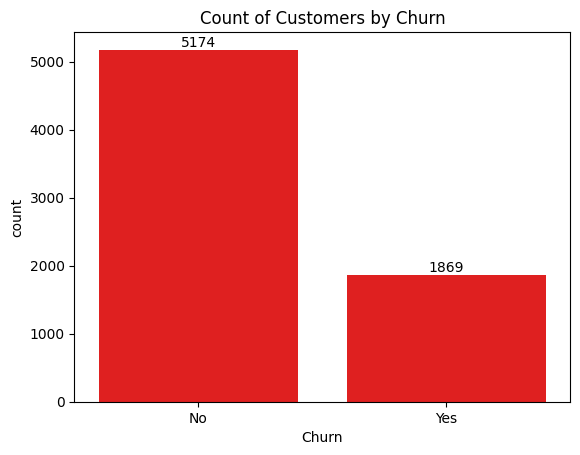

In [10]:
ax = sns.countplot( x = "Churn" , data=df , color = 'red')
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

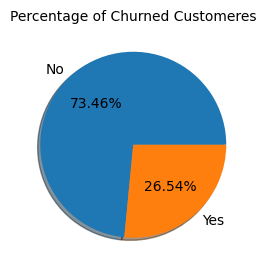

In [19]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%" , shadow = 'True')
plt.title("Percentage of Churned Customeres", fontsize = 10)
plt.show()

***From this we can conclude that 26.5% of customers have churned out.***

---



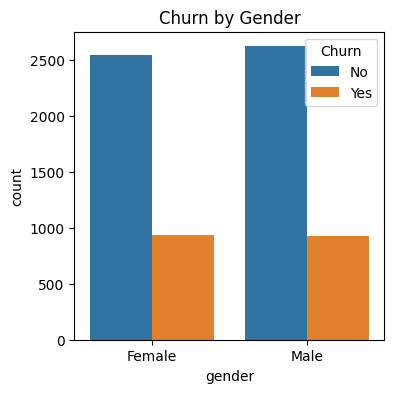

In [34]:
plt.figure(figsize = (4,4))
sns.countplot(x = "gender", data = df, hue = "Churn")
plt.title("Churn by Gender")
plt.show()

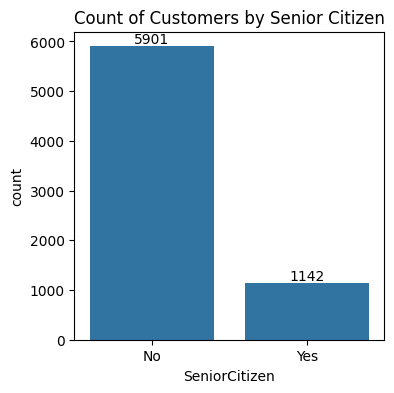

In [39]:
plt.figure(figsize = (4,4))
bx = sns.countplot(x = "SeniorCitizen", data = df)
plt.title("Count of Customers by Senior Citizen")
bx.bar_label(bx.containers[0])
plt.show()

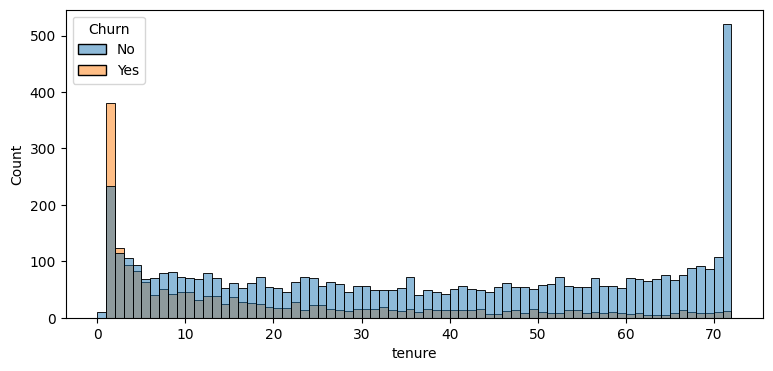

In [47]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.show()

**Customers who have used the service for a short period (1-2 months) are more likely to churn, while those with longer tenure tend to stay.**

In [49]:
def sec(value):
  if value < 50:
    return "Low Monthly Charges"
  elif 50 <= value < 100:
    return "Medium Monthly Charges"
  elif value >=100:
    return "High Monthly Charges"

df["MonthlyCharges"] = df['MonthlyCharges'].apply(sec);

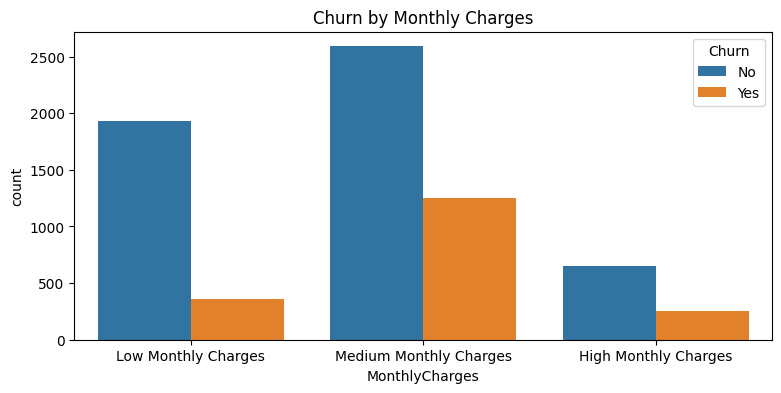

In [52]:
plt.figure(figsize = (9,4))
sns.countplot(x = "MonthlyCharges", data = df, hue = "Churn")
plt.title("Churn by Monthly Charges")
plt.show()

**The figure shows that customers with moderate monthly charges have a higher churn rate.**

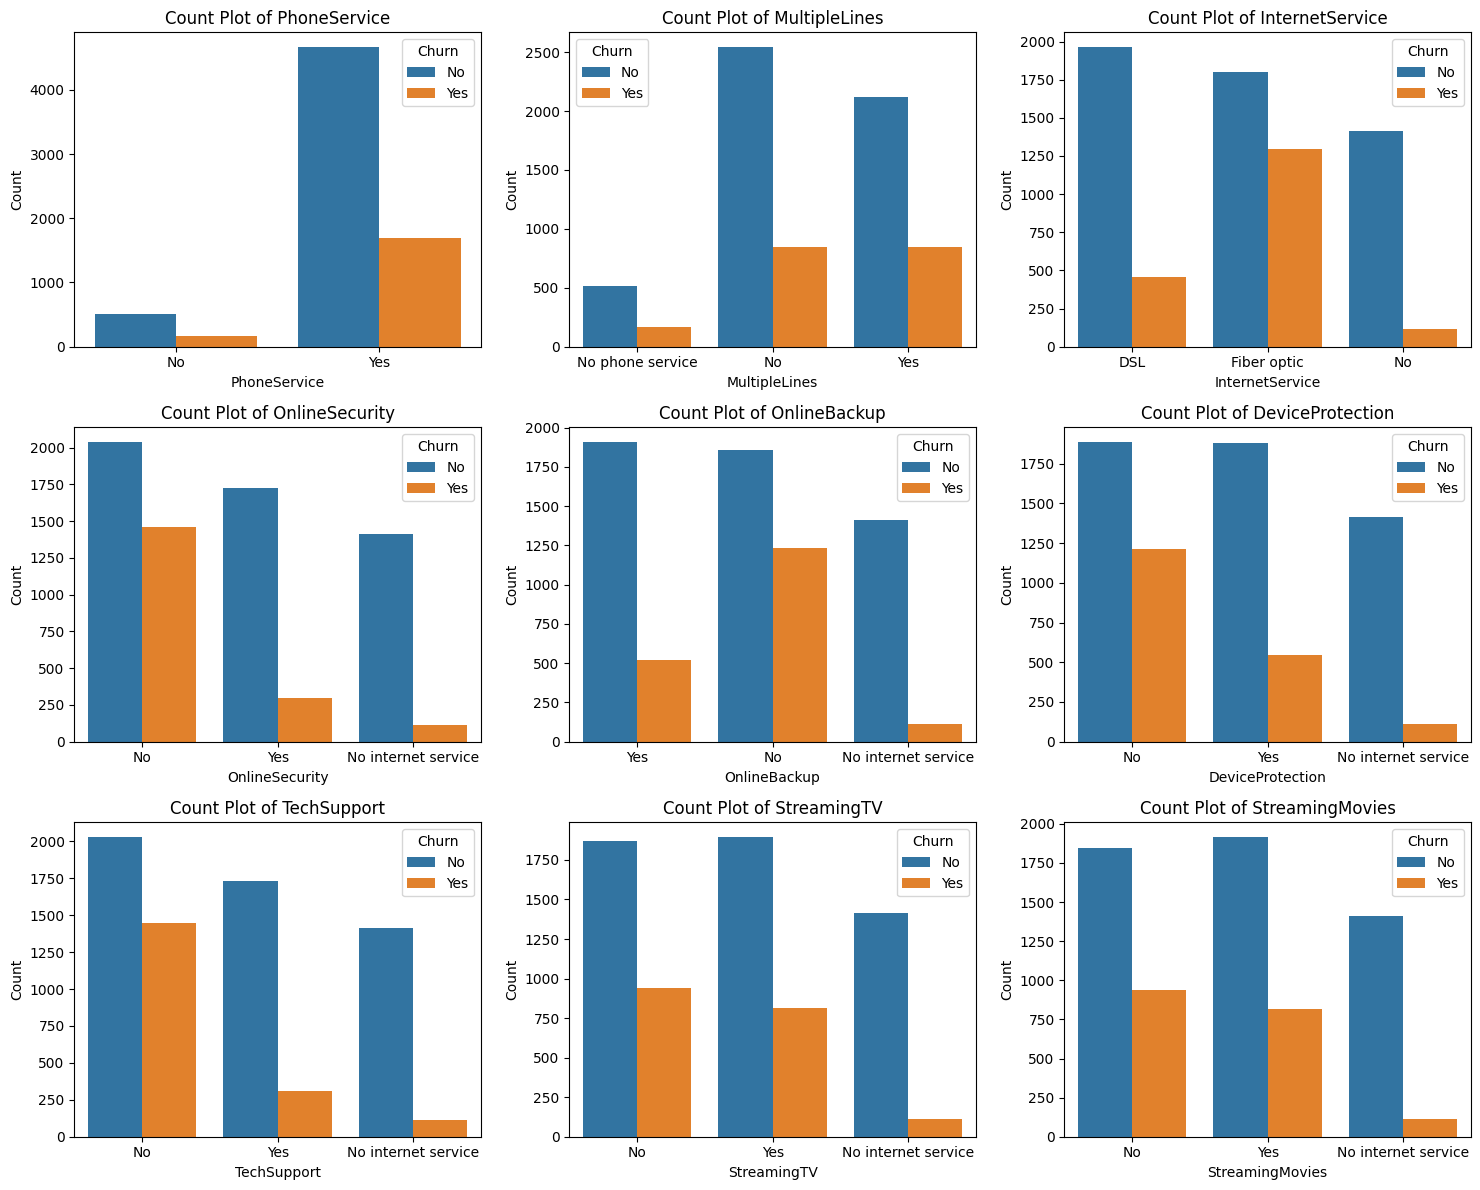

In [53]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns for the subplot grid (you can change this)
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust figsize as needed

# Flatten the axes array for easy iteration (handles both 1D and 2D arrays)
axes = axes.flatten()

# Iterate over columns and plot count plots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue = df["Churn"])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()